In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('voice.csv')
dataset=dataset.replace(to_replace="male",value=1)
dataset=dataset.replace(to_replace="female",value=0)
dataset.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


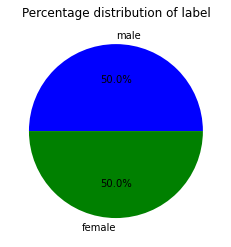

In [37]:
count = dataset.pivot_table(columns=['label'], aggfunc='size')
gender = [count[0], count[1]]
pie_labels = ["male", "female"]
colors = ['BLUE', 'GREEN']
plt.pie(gender, labels=pie_labels, autopct="%1.1f%%", colors=colors)
plt.title("Percentage distribution of label")
plt.show()

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(y_train)

[1 1 1 ... 0 0 0]


In [8]:
print(X_test)

[[ 0.19528383  0.03766286  0.19572816 ...  7.4296875   7.2890625
   0.09409376]
 [ 0.17948993  0.06042679  0.1815235  ...  4.546875    4.5234375
   0.11371693]
 [ 0.22159779  0.02752513  0.22067797 ...  4.125       3.9140625
   0.10689732]
 ...
 [ 0.20845323  0.03525388  0.2039604  ... 15.234375   15.0703125
   0.07029549]
 [ 0.16565888  0.06026657  0.17485597 ...  4.3203125   4.25
   0.08555453]
 [ 0.19145471  0.03762533  0.19155624 ...  9.0234375   9.
   0.13564645]]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
print(X_train)


[[ 0.09767467  0.09509476  0.42032103 ... -0.13286286 -0.12451985
  -0.26334622]
 [-0.35848485  1.11527934 -0.45159498 ...  0.54459212  0.55742084
  -0.02287791]
 [-0.70387362  0.11485901 -0.58556765 ... -0.42161417 -0.43105996
   1.10093954]
 ...
 [-1.5719578   1.50482645 -1.23038323 ... -0.34387343 -0.33554384
  -0.16422602]
 [ 1.90149339 -1.64978028  1.57609724 ...  1.3197783   1.32821373
  -0.43030433]
 [ 0.19254193 -1.39349351  0.14702    ...  1.19317196  1.20159934
  -0.32447473]]


In [12]:
print(X_test)


[[ 0.48573123 -1.16480237  0.27789201 ...  0.66675613  0.64183044
  -0.68342998]
 [-0.05145399  0.20523552 -0.12125809 ... -0.15285334 -0.1445116
  -0.51270684]
 [ 1.38072692 -1.7749372   0.97898046 ... -0.27279619 -0.3177734
  -0.57203803]
 ...
 [ 0.93365157 -1.30978597  0.50921757 ...  2.88569883  2.85425039
  -0.89047669]
 [-0.52187848  0.19559243 -0.30861546 ... -0.21726709 -0.22225728
  -0.75772185]
 [ 0.35549465 -1.16706089  0.1606614  ...  1.11987356  1.12829627
  -0.32191843]]


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
print(classifier.predict(sc.transform(X_train)))


[1 1 1 ... 0 0 0]


In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
L0GISTIC_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[361  12]
 [  5 414]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       373
           1       0.97      0.99      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
print(classifier.predict(sc.transform(X_train)))

[1 1 1 ... 0 0 0]


In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
DECICION_TREE_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[360  13]
 [ 13 406]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       373
           1       0.97      0.97      0.97       419

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [23]:
print(classifier.predict(sc.transform(X_train)))

[1 1 1 ... 0 0 0]


In [24]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
SVM_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


[[363  10]
 [  6 413]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       373
           1       0.98      0.99      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [27]:
print(classifier.predict(sc.transform(X_train)))


[1 1 1 ... 0 0 0]


In [28]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
RANDOM_FOREST_CLASSIFIER_ACCURACY=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


[[367   6]
 [ 13 406]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       373
           1       0.99      0.97      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
print(classifier.predict(sc.transform(X_train)))

[0 1 1 ... 1 0 0]


In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_CLASSIFIER_ACCURACY = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[362  11]
 [  7 412]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       373
           1       0.97      0.98      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [34]:
print("LOGISTIC REGRESSION CLASSIFIER = ",L0GISTIC_CLASSIFIER_ACCURACY)
print("DECISION TREE CLASSIFIER = ",DECICION_TREE_CLASSIFIER_ACCURACY)
print("SVM CLASSIFIER = ",SVM_CLASSIFIER_ACCURACY)
print("RANDOM FOREST CLASSIFIER = ",RANDOM_FOREST_CLASSIFIER_ACCURACY)
print("KNN CLASSIFIER = ",KNN_CLASSIFIER_ACCURACY)


LOGISTIC REGRESSION CLASSIFIER =  0.9785353535353535
DECISION TREE CLASSIFIER =  0.9671717171717171
SVM CLASSIFIER =  0.9797979797979798
RANDOM FOREST CLASSIFIER =  0.976010101010101
KNN CLASSIFIER =  0.9772727272727273
